Examine role of different M-A neural population parameters in behavioral prediction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_plot

cc = np.concatenate

In [4]:
df_dyn_param = pd.read_csv('data/simple/neur/baker_dyn_fit_param.csv')
dyn_ffv_fit_data = np.load(f'data/simple/mlv/neur_basic/baker_dyn_nm91_zh23_ffv_mn_60_ridge_alpha_10.npy', allow_pickle=True)[0]

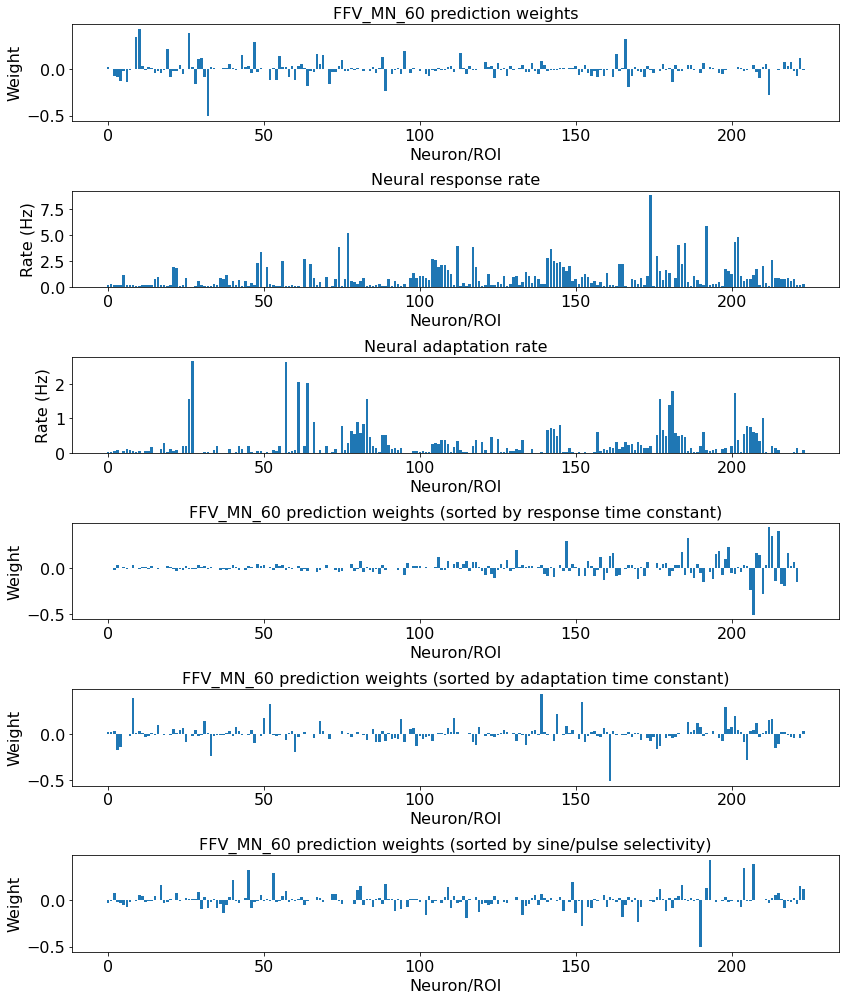

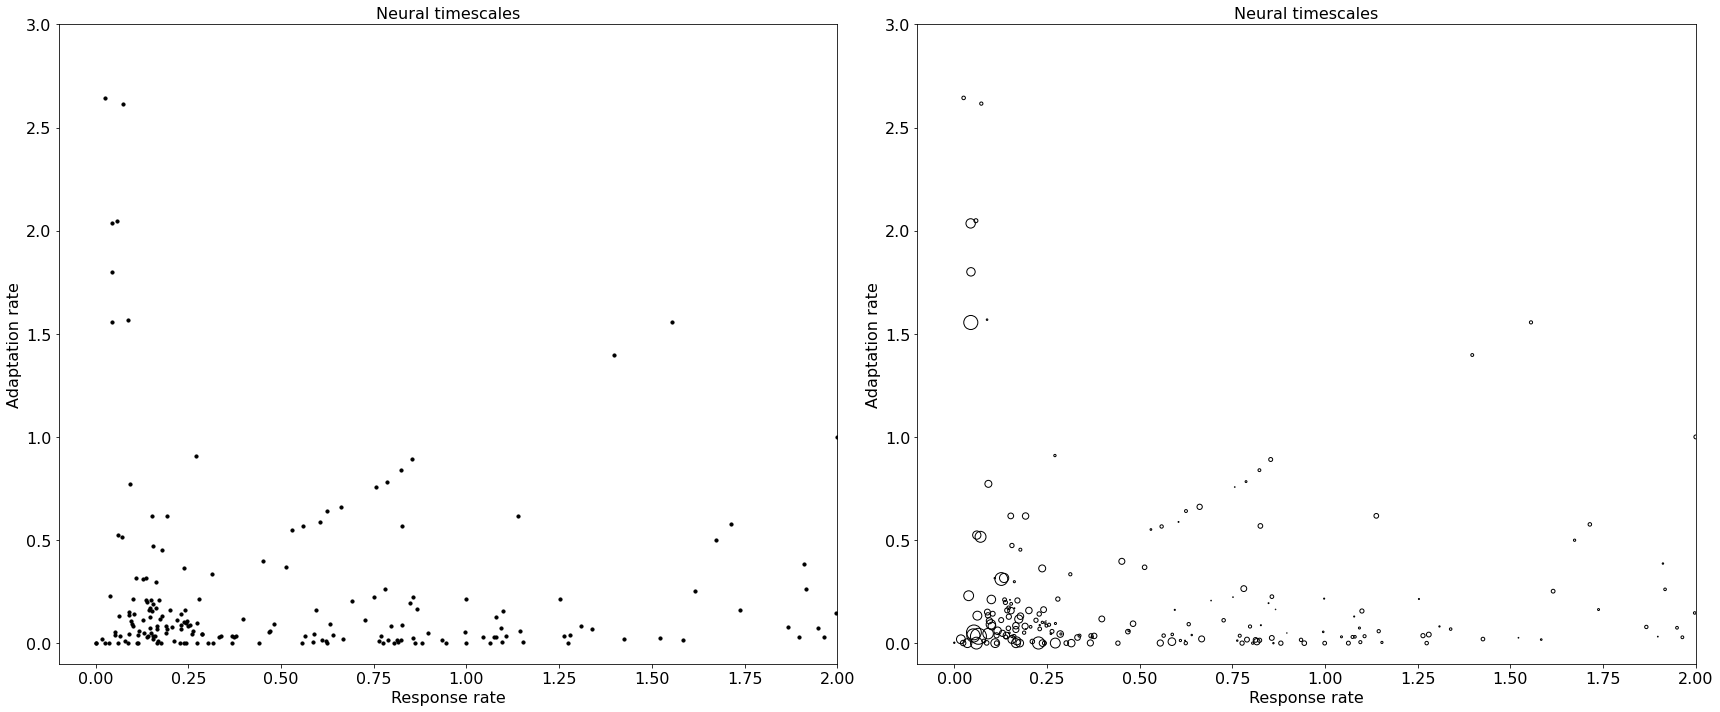

In [5]:
w_mn = dyn_ffv_fit_data['w']['FFV_MN_60'].mean(0)
x_ss = np.array(df_dyn_param['X_S'])
x_ps = np.array(df_dyn_param['X_P'])
sels = (np.abs(x_ss) - np.abs(x_ps)) / (np.abs(x_ss) + np.abs(x_ps))

fig, axs = plt.subplots(6, 1, figsize=(12, 14), tight_layout=True)
axs[0].bar(range(224), w_mn)
set_plot(axs[0], x_label='Neuron/ROI', y_label='Weight', title='FFV_MN_60 prediction weights', font_size=16)
axs[1].bar(range(224), 1/df_dyn_param['TAU_R'])
set_plot(axs[1], x_label='Neuron/ROI', y_label='Rate (Hz)', title='Neural response rate', font_size=16)
axs[2].bar(range(224), 1/df_dyn_param['TAU_A'])
set_plot(axs[2], x_label='Neuron/ROI', y_label='Rate (Hz)', title='Neural adaptation rate', font_size=16)
axs[3].bar(range(224), w_mn[np.argsort(df_dyn_param['TAU_R'])])
set_plot(axs[3], x_label='Neuron/ROI', y_label='Weight', title='FFV_MN_60 prediction weights (sorted by response time constant)', font_size=16)
axs[4].bar(range(224), w_mn[np.argsort(df_dyn_param['TAU_A'])])
set_plot(axs[4], x_label='Neuron/ROI', y_label='Weight', title='FFV_MN_60 prediction weights (sorted by adaptation time constant)', font_size=16)
axs[5].bar(range(224), w_mn[np.argsort(sels)])
set_plot(axs[5], x_label='Neuron/ROI', y_label='Weight', title='FFV_MN_60 prediction weights (sorted by sine/pulse selectivity)', font_size=16)

fig, axs = plt.subplots(1, 2, figsize=(24, 10), tight_layout=True)
axs[0].scatter(1/df_dyn_param['TAU_R'], 1/df_dyn_param['TAU_A'], c='k', s=10)
set_plot(axs[0], x_label='Response rate', y_label='Adaptation rate', title='Neural timescales', font_size=16)

axs[1].scatter(1/df_dyn_param['TAU_R'], 1/df_dyn_param['TAU_A'],  s=np.abs(w_mn)*500, facecolors='none', edgecolors='k')
set_plot(axs[1], x_label='Response rate', y_label='Adaptation rate', title='Neural timescales', font_size=16)

for ax in axs:
    set_plot(ax, x_lim=(-.1, 2), y_lim=(-.1, 3))